# Data Preprocessing

In [1]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from sqlalchemy import create_engine
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Create SQLAlchemy engine for SQLite
engine = create_engine('sqlite:///Data/dementia_data.db')

# Retrieve data from SQLite Database
query = "SELECT * FROM dementia_data"
df = pd.read_sql(query, con=engine)

# Display DataFrame
df.head()


,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,None,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,None,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [3]:
# Impute 'Dosage in mg' with zero
df['Dosage in mg'] = df['Dosage in mg'].fillna(0)

# Fill missing 'Prescription' values with 'None'
df['Prescription'].fillna('None', inplace=True)
df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,None,0.0,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,None,0.0,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [4]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

df_encoded.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,...,Medication_History_No,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Good,Sleep_Quality_Poor,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,0.0,60,10,...,True,False,False,True,False,False,True,True,False,False
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,12.0,61,1,...,False,True,False,True,False,False,True,False,True,False
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,0.0,69,8,...,True,False,False,False,True,False,True,False,True,False
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,23.0,78,5,...,False,True,True,False,False,False,True,False,False,True
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,20.0,77,0,...,False,True,False,True,False,True,False,True,False,False


In [5]:
# Define target variable
target = "Dementia"

# Split the dataframe into features and target
X = df_encoded.drop(columns=[target])  # Features
y = df_encoded[target]  # Target

In [6]:
# Stratified split into a training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48, stratify=y)

In [7]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define, Compile and Train the Deep Neural Network Model

In [8]:
# Access the number of input features
number_input_features = X_train.shape[1]

# Define the model 
nn = tf.keras.models.Sequential()

hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 2

# Input layer
nn.add(tf.keras.layers.InputLayer(shape=(number_input_features,)))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [9]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=25)

Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2755 - loss: 0.7436 - val_accuracy: 0.3040 - val_loss: 0.7165
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3281 - loss: 0.7111 - val_accuracy: 0.4040 - val_loss: 0.6928
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5022 - loss: 0.6883 - val_accuracy: 0.5520 - val_loss: 0.6762
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5953 - loss: 0.6736 - val_accuracy: 0.6920 - val_loss: 0.6560
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7174 - loss: 0.6424 - val_accuracy: 0.7960 - val_loss: 0.6228
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7911 - loss: 0.6052 - val_accuracy: 0.8440 - val_loss: 0.5754
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8734 - loss: 0.5513 - val_accuracy: 0.8920 - val_loss: 0.5194
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8956 - loss: 0.5007 - val_accuracy: 0.9400 - val_loss

# Model Evaluation

In [11]:
# Evaluate the model
loss, accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9980 - loss: 0.0260 
Test Accuracy: 1.00


In [12]:
# Make predictions
y_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [13]:
# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a DataFrame with appropriate labels
conf_matrix_df = pd.DataFrame(
    conf_matrix, index=["Actual No", "Actual Yes"], columns=["Predicted No", "Predicted Yes"]
)

In [14]:
# Printing the confusion matrix DataFrame
print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
            Predicted No  Predicted Yes
Actual No            129              0
Actual Yes             1            120


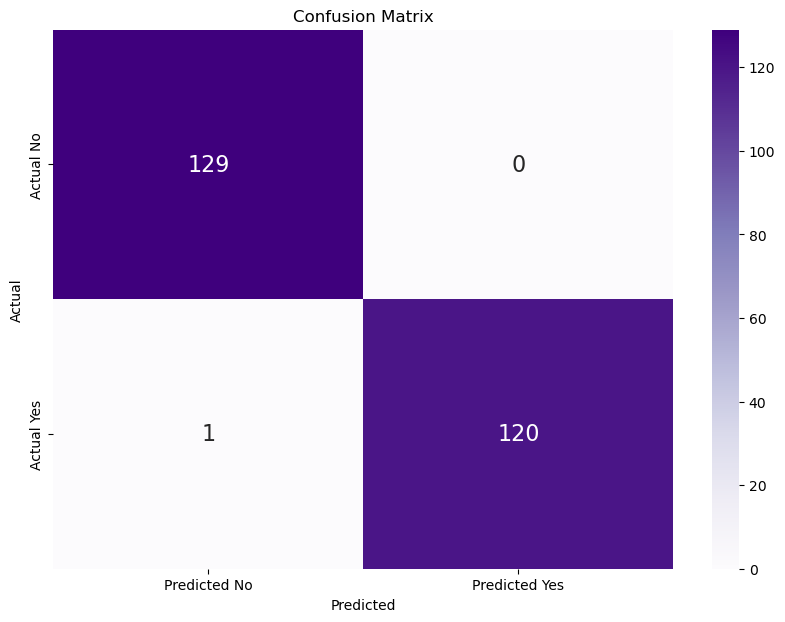

In [15]:
# Plotting the confusion matrix with appropriate labels
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Purples", annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
# Print classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       129
           1       1.00      0.99      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

